<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Simulacion-I/blob/main/Metropolis_Hastings_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se usará
$$\alpha(X, Y) = \min\left(1, \frac{\pi(Y)q(X|Y)}{\pi(X)q(Y|X)}\right)$$

$$q \sim N(x_i, y_i, I_2)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Definiciones para la funicón objetivo $f$, la función $\alpha$ y una simplificación de la función de distribución normal bivariada

In [2]:
def f(x, y):
  c = 1/20216.335877
  return c * np.exp(-(((x*y)**2) + x**2 + y**2 - 8*x - 8*y)/2)


def a(x, y):
  return min(1, f(*y)/f(*x))

def norm(mu1, mu2, s = [[1, 0], [0, 1]]):
  return np.random.multivariate_normal([mu1, mu2], s, size=None, check_valid='warn', tol=1e-8)

Se quiere simular la función:
$$\frac{1}{20216.335877}e^{-\frac{x^2y^2 + x^2 + y^2 - 8x - 8y}{2}}$$

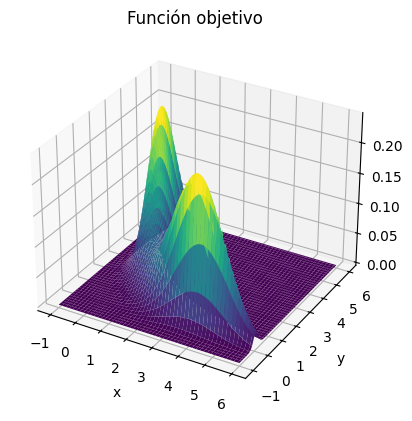

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.linspace(-1, 6, 100)
y = np.linspace(-1, 6, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title('Función objetivo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Implementación del algoritmo de Metropolis-Hastings

El algoritmo de Metropolis-Hastings funciona porque construye una cadena de Markov cuya distribución estacionaria es la deseada $\pi$.
Esto se garantiza mediante la condición de balance detallado:
$$
\pi_i q(i,j)\,\alpha(i,j) = \pi_j q(j,i)\,\alpha(j,i),
$$
donde $q(i,j)$ es la probabilidad de pasar el estado $j$ desde $i$, y $\alpha(i,j)$ es la probabilidad de aceptación.

La probabilidad de aceptar un valor candidato $j$ se define como
$$
\alpha(i,j) = \min\left(1, \frac{\pi_j q(j,i)}{\pi_i q(i,j)}\right),
$$
lo que asegura que las transiciones favorezcan los estados con mayor probabilidad bajo $\pi$, manteniendo la reversibilidad de la cadena.
De esta forma, las muestras generadas convergen a la distribución objetivo $\pi$.


In [3]:
def MH(x, y, n):
  for i in range(n):
    z = norm(mu1=x[-1], mu2=y[-1])
    u = np.random.uniform()
    X = [x[-1], y[-1]]
    if u <= a(X, z):
      x.append(z[0])
      y.append(z[1])
    else:
      x.append(x[-1])
      y.append(y[-1])
  return x, y

Se iniciará el algoritmo de MH en el punto (0, 0)

In [6]:
x, y = MH([0], [0], 10000)

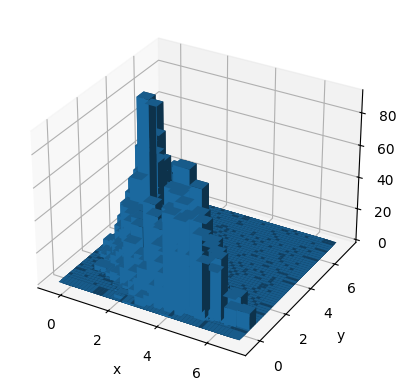

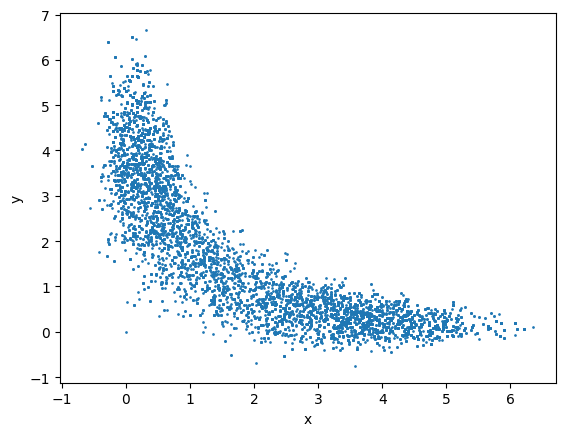

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=50)

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.title('Histograma de la función objetivo')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

plt.scatter(x, y, s=0.9)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Usando los resultados anteriroes, se obtiene el máximo de la función $f$

Máximo: 0.24305118742444778
En x = 3.737373737373737, y = 0.2727272727272727


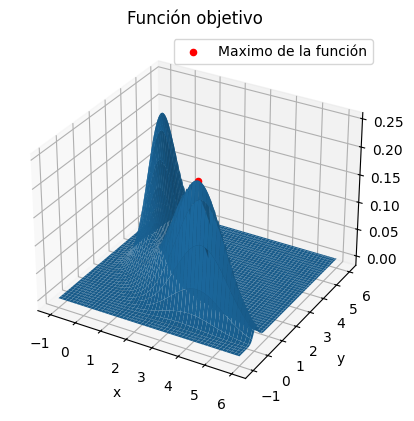

In [36]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

z_max = np.max(Z)

i, j = np.unravel_index(np.argmax(Z), Z.shape)

x_max = X[i, j]
y_max = Y[i, j]

print(f"Máximo: {z_max}")
print(f"En x = {x_max}, y = {y_max}")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.linspace(-1, 6, 100)
y = np.linspace(-1, 6, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax.plot_surface(X, Y, Z)
ax.scatter(x_max, y_max, z_max, color='red', label = "Maximo de la función")
plt.title('Función objetivo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
